In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense, Reshape, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils

In [2]:
# Define the input shape
input_shape = (224, 224, 3)
num_classes = 2  # Replace with the actual number of classes


In [3]:
# Squeeze-and-Excitation block
def se_block(x, ratio=16):
    channels = x.shape[-1]
    squeeze = GlobalAveragePooling2D()(x)
    excitation = Dense(channels // ratio, activation='relu')(squeeze)
    excitation = Dense(channels, activation='sigmoid')(excitation)
    excitation = Reshape((1, 1, channels))(excitation)
    scaled = Multiply()([x, excitation])
    return scaled

In [4]:
# Build a custom SENet-like model
def build_senet(input_shape, num_classes):
    input = Input(shape=input_shape)
    
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input)
    x = se_block(x)

    # Add more Conv2D and SE blocks as needed
    # Example:
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = se_block(x)

    x = GlobalAveragePooling2D()(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input, outputs=output)
    return model

In [5]:
# Create the SENet-like model
model = build_senet(input_shape, num_classes)

In [6]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# View the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 64)         9472      ['input_1[0][0]']             
                                                                                                  
 global_average_pooling2d (  (None, 64)                   0         ['conv2d[0][0]']              
 GlobalAveragePooling2D)                                                                          
                                                                                                  
 dense (Dense)               (None, 4)                    260       ['global_average_pooling2d

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create image data generators for the training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [8]:
batch_size = 32  # Adjust the batch size according to your system's capacity

# Generate training and validation data
training_set = train_datagen.flow_from_directory(
    'chest_xray/train',  # Replace with the actual path
    target_size=input_shape[:2],  # Use the defined input shape
    batch_size=batch_size,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    'chest_xray/test',  # Replace with the actual path
    target_size=input_shape[:2],  # Use the defined input shape
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [9]:
# Train the model
epochs = 10  # Replace with the desired number of epochs
model.fit(
    training_set,
    validation_data=test_set,
    epochs=epochs,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10
163/163 [==============================] - 203s 1s/step - loss: 0.5804 - accuracy: 0.7395 - val_loss: 0.7622 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 214s 1s/step - loss: 0.5719 - accuracy: 0.7429 - val_loss: 0.7178 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 230s 1s/step - loss: 0.5510 - accuracy: 0.7372 - val_loss: 0.6950 - val_accuracy: 0.6074
Epoch 4/10
163/163 [==============================] - 233s 1s/step - loss: 0.5172 - accuracy: 0.7479 - val_loss: 0.6578 - val_accuracy: 0.5833
Epoch 5/10
163/163 [==============================] - 243s 1s/step - loss: 0.4678 - accuracy: 0.7732 - val_loss: 0.6764 - val_accuracy: 0.6090
Epoch 6/10
163/163 [==============================] - 242s 1s/step - loss: 0.4628 - accuracy: 0.7738 - val_loss: 0.6461 - val_accuracy: 0.6234
Epoch 7/10
163/163 [==============================] - 247s 2s/step - loss: 0.4485 - accuracy: 0.7826 - val_loss: 0.6048 - val_accuracy: 0.6667

In [10]:
img=image.load_img('chest_xray/test/PNEUMONIA/person1_virus_11.jpeg',target_size=(224,224))

NameError: name 'image' is not defined

In [ ]:
x=image.img_to_array(img)

In [ ]:
x=np.expand_dims(x, axis=0)


In [ ]:
from keras.applications.resnet50 import preprocess_input

img_data=preprocess_input(x)

In [ ]:
classes=model.predict(img_data)

1/1 [==============================] - 0s 116ms/step


In [ ]:
result=int(classes[0][0])

In [ ]:
if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

Result is Normal


In [ ]:
# Initialize an empty list to store true and predicted labels
true_labels = []
predicted_labels = []

In [ ]:
# Loop through the test set and predict labels
for i in range(len(test_set)):
    batch = test_set[i]
    images, labels = batch
    predictions = model.predict(images)
    
    # Convert one-hot encoded labels to class labels
    true_labels.extend(np.argmax(labels, axis=1))
    predicted_labels.extend(np.argmax(predictions, axis=1))

1/1 [==============================] - 0s 154ms/step


In [ ]:
true_labels

[1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,


In [ ]:
type(true_labels)

list

In [ ]:
predicted_labels

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
len(predicted_labels)

624

In [ ]:
len(true_labels)

624

In [ ]:
t_labels=np.array(true_labels)

In [ ]:
p_labels=np.array(predicted_labels)

In [ ]:
type(t_labels)

numpy.ndarray

In [ ]:
type(p_labels)

numpy.ndarray

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)


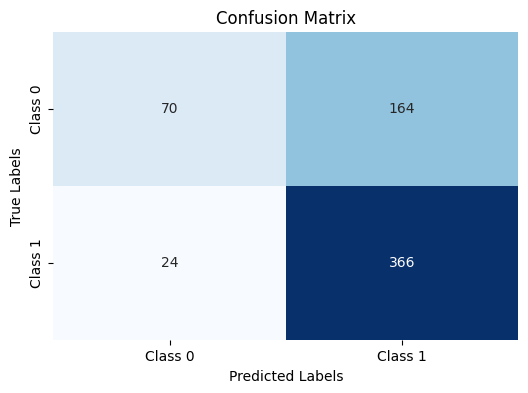

In [ ]:
# Plot the confusion matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(conf_matrix)) + 0.5, ['Class 0', 'Class 1'])  # Modify class labels accordingly
plt.yticks(np.arange(len(conf_matrix)) + 0.5, ['Class 0', 'Class 1'])  # Modify class labels accordingly
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Finding precision and recall
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy   :", accuracy)
precision = precision_score(true_labels, predicted_labels)
print("Precision :", precision)
recall = recall_score(true_labels, predicted_labels)
print("Recall    :", recall)
F1_score = f1_score(true_labels, predicted_labels)
print("F1-score  :", F1_score)

Accuracy   : 0.6987179487179487
Precision : 0.690566037735849
Recall    : 0.9384615384615385
F1-score  : 0.7956521739130434


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense, Reshape, Multiply, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [2]:
# Define the input shape
input_shape = (224, 224, 3)
num_classes = 2  # Replace with the actual number of classes


In [3]:
# Squeeze-and-Excitation block
def se_block(x, ratio=16):
    channels = x.shape[-1]
    squeeze = GlobalAveragePooling2D()(x)
    excitation = Dense(channels // ratio, activation='relu')(squeeze)
    excitation = Dense(channels, activation='sigmoid')(excitation)
    excitation = Reshape((1, 1, channels))(excitation)
    scaled = Multiply()([x, excitation])
    return scaled

In [4]:
# Build a custom SENet-like model
def build_senet(input_shape, num_classes):
    input = Input(shape=input_shape)
    
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input)
    x = se_block(x)
    x = BatchNormalization()(x)

    # Add more Conv2D and SE blocks as needed
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = se_block(x)
    x = BatchNormalization()(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)

    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input, outputs=output)
    return model

In [5]:
# Create the SENet-like model
model = build_senet(input_shape, num_classes)


In [6]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [7]:
# View the model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 64)         9472      ['input_1[0][0]']             
                                                                                                  
 global_average_pooling2d (  (None, 64)                   0         ['conv2d[0][0]']              
 GlobalAveragePooling2D)                                                                          
                                                                                                  
 dense (Dense)               (None, 4)                    260       ['global_average_pooling2d

In [8]:
# Learning Rate Schedule
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 5:
        lr *= 1e-2
    elif epoch > 10:
        lr *= 1e-1
    return lr

lr_callback = LearningRateScheduler(lr_schedule)


In [9]:
# Image Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32  # Adjust the batch size according to your system's capacity


In [10]:
# Generate training and validation data
training_set = train_datagen.flow_from_directory(
    'chest_xray/train',  # Replace with the actual path
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    'chest_xray/test',  # Replace with the actual path
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
# Train the model
epochs = 15  # Adjust the number of epochs
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=epochs,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    callbacks=[lr_callback]
)


Epoch 1/15
163/163 [==============================] - 258s 2s/step - loss: 0.3832 - accuracy: 0.8209 - val_loss: 1.2363 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/15
163/163 [==============================] - 292s 2s/step - loss: 0.3001 - accuracy: 0.8660 - val_loss: 4.4869 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/15
163/163 [==============================] - 294s 2s/step - loss: 0.2920 - accuracy: 0.8687 - val_loss: 1.2140 - val_accuracy: 0.5593 - lr: 0.0010
Epoch 4/15
163/163 [==============================] - 270s 2s/step - loss: 0.2755 - accuracy: 0.8735 - val_loss: 2.3603 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 5/15
163/163 [==============================] - 266s 2s/step - loss: 0.2696 - accuracy: 0.8796 - val_loss: 0.4429 - val_accuracy: 0.8013 - lr: 0.0010
Epoch 6/15
163/163 [==============================] - 268s 2s/step - loss: 0.2550 - accuracy: 0.8901 - val_loss: 1.2351 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 7/15
163/163 [==============================] - 270s 2s/st

In [12]:
# Model Evaluation and Metrics
true_labels = []
predicted_labels = []

In [13]:
for i in range(len(test_set)):
    batch = test_set[i]
    images, labels = batch
    predictions = model.predict(images)

    true_labels.extend(np.argmax(labels, axis=1))
    predicted_labels.extend(np.argmax(predictions, axis=1))


1/1 [==============================] - 0s 285ms/step


In [14]:
# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)


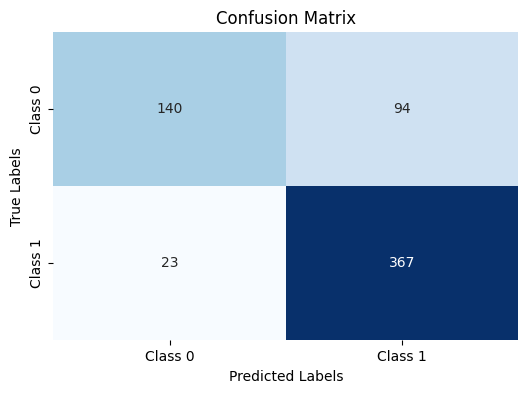

In [15]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(conf_matrix)) + 0.5, ['Class 0', 'Class 1'])
plt.yticks(np.arange(len(conf_matrix)) + 0.5, ['Class 0', 'Class 1'])
plt.show()

In [16]:
# Classification Metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print("Accuracy   :", accuracy)
print("Precision  :", precision)
print("Recall     :", recall)
print("F1-score   :", f1)

Accuracy   : 0.8125
Precision  : 0.7960954446854663
Recall     : 0.941025641025641
F1-score   : 0.8625146886016452
